# Universidade de Caxias do Sul
## Área de Exatas e Engenharias
## Pós-Graduação em Ciência de Dados
## Aluno Gabriel Orlandin Gomes

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB,CategoricalNB
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import mean_squared_error,mean_absolute_error


In [ ]:
from google.colab import files
arquivo = files.upload()


Saving breast-cancer.csv to breast-cancer.csv


In [ ]:
import io
dados = pd.read_csv(io.BytesIO(arquivo['breast-cancer.csv']))
dados.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
dados['diagnosis']=dados['diagnosis'].replace({'M': 1,'B': 0}) # Maligno 1 e Benigno 0

<Figure size 720x432 with 0 Axes>

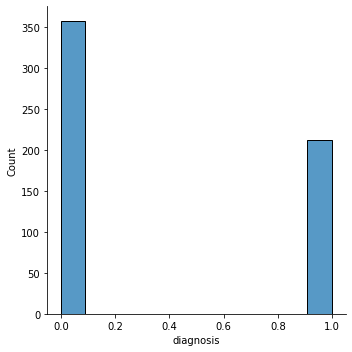

In [ ]:
plt.figure(figsize=(10,6))
sb.displot(dados['diagnosis'])

In [ ]:

print(dados.shape)


(569, 32)


In [ ]:
dados

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
# Classes do problema
print(dados.iloc[:,1])

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64


In [ ]:
dados_copia = dados.copy()

In [ ]:
# Atributos do problema
print(dados.iloc[:,2:-1])

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  sym

In [ ]:
# Remove a coluna de número do dia
dados = dados.drop(['id'],axis=1)

In [ ]:
X= dados.iloc[:,1:-1]
print(X)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  sym

In [ ]:
y=dados.iloc[:,0]
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64


In [ ]:
dados

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
# visualize graficamente os valores dos atributos combinados em pares

import seaborn as sb

sb.pairplot(dados)

Output hidden; open in https://colab.research.google.com to view.

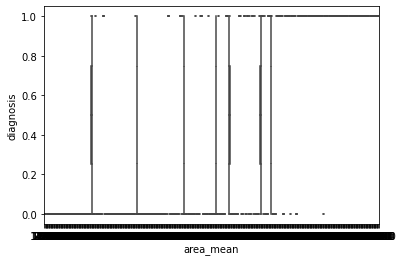

In [ ]:
sb.boxplot(x='area_mean',y='diagnosis',data=dados)

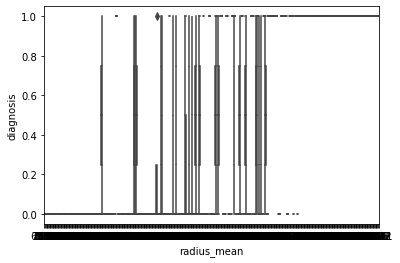

In [ ]:
sb.boxplot(x='radius_mean',y='diagnosis',data=dados)

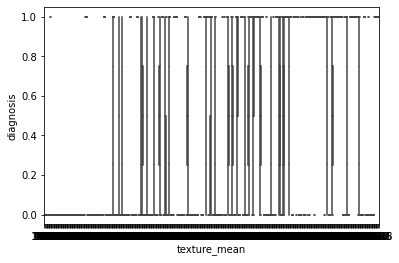

In [ ]:
sb.boxplot(x='texture_mean',y='diagnosis',data=dados)


# Início do treinamento usando modelo Gaussiano


In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:

#Cria um classificador Gaussiano 
gnb = GaussianNB()
predictions = cross_val_predict(gnb,X,y,cv=5)
#Calcula acurácia do treino
accuracy_score(y,predictions)*100

93.67311072056239

# Resultado descritivo

In [ ]:

print(confusion_matrix(y,predictions))  
print(classification_report(y,predictions,zero_division=0)) 

[[346  11]
 [ 25 187]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       357
           1       0.94      0.88      0.91       212

    accuracy                           0.94       569
   macro avg       0.94      0.93      0.93       569
weighted avg       0.94      0.94      0.94       569



# Resultado Visual

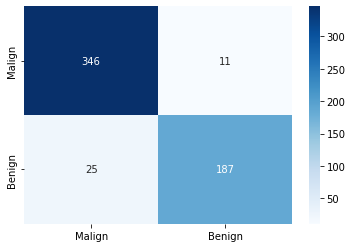

In [ ]:
import seaborn as sns
cf = confusion_matrix(y,predictions)
lbl1=['Malign', 'Benign']
lbl2 = ['Malign', 'Benign']
sns.heatmap(cf,annot=True,cmap="Blues", fmt="d",xticklabels=lbl1,yticklabels=lbl2)

In [ ]:
#Acurácia prevista do dataset

print(predictions)
print("Acurácia:",metrics.accuracy_score(y, predictions))

[1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0
 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1
 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 1 1 

In [ ]:
mean_absolute_error(y,predictions)

0.0632688927943761

In [ ]:
mean_squared_error(y,predictions)

0.0632688927943761

# Início do treinamento usando modelo de Bernoulli

In [ ]:
gnbB = BernoulliNB()
predictionsB = cross_val_predict(gnbB,X,y,cv=3)
#Calcula acurácia do treino
accuracy_score(y,predictionsB)*100


62.741652021089635

In [ ]:
print(confusion_matrix(y,predictionsB))  
print(classification_report(y,predictionsB,zero_division=0)) 

[[357   0]
 [212   0]]
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       357
           1       0.00      0.00      0.00       212

    accuracy                           0.63       569
   macro avg       0.31      0.50      0.39       569
weighted avg       0.39      0.63      0.48       569



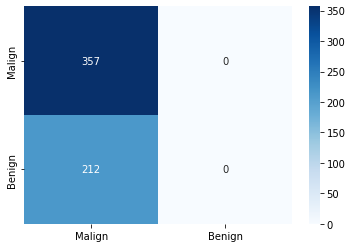

In [ ]:
cfB = confusion_matrix(y,predictionsB)
lbl1=['Malign', 'Benign']
lbl2 = ['Malign', 'Benign']
sns.heatmap(cfB,annot=True,cmap="Blues", fmt="d",xticklabels=lbl1,yticklabels=lbl2)

In [ ]:
mean_absolute_error(y,predictionsB)

0.37258347978910367

In [ ]:
mean_squared_error(y,predictionsB)

0.37258347978910367


# Início do treinamento usando modelo Multinominal

In [ ]:
gnbM = MultinomialNB()
predictionsM = cross_val_predict(gnbM,X,y,cv=3)
#Calcula acurácia do treino
accuracy_score(y,predictionsM)*100

89.45518453427064

In [ ]:
print(confusion_matrix(y,predictionsM))  
print(classification_report(y,predictionsM,zero_division=0))

[[346  11]
 [ 49 163]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       357
           1       0.94      0.77      0.84       212

    accuracy                           0.89       569
   macro avg       0.91      0.87      0.88       569
weighted avg       0.90      0.89      0.89       569



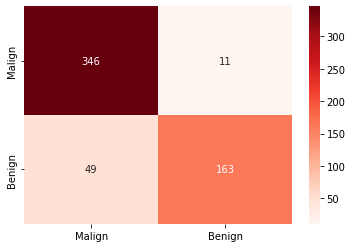

In [ ]:
cfM = confusion_matrix(y,predictionsM)
lbl1=['Malign', 'Benign']
lbl2 = ['Malign', 'Benign']
sns.heatmap(cfM,annot=True,cmap="Reds", fmt="d",xticklabels=lbl1,yticklabels=lbl2)

#  Início do treinamento usando modelo Categórico


# Este dataset do Breast Cancer são modelos númericos, não sendo possível utilizar o modelo categórico

In [ ]:
gnbC = CategoricalNB()

In [ ]:
predictionsC = cross_val_predict(gnbC,X,y,cv=3)

IndexError: ignored